## Hard vs Soft 

In [2]:
from modules.linearcode import * 
from modules.aux_functions import * 
from scipy import special
import numpy as np
import math
import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Define a matriz geradora que será usada para codificar a informação (8,4)
G_8_4 = np.array([[0,1,1,1,1,0,0,0],
                  [1,1,1,0,0,1,0,0],
                  [1,1,0,1,0,0,1,0],
                  [1,0,1,1,0,0,0,1]]) # Matriz geradora

# Define a matriz geradora que será usada para codificar a informação (6,3)
G_6_3 = np.array([[0,1,1,1,0,0],
                  [1,0,1,0,1,0],
                  [1,1,0,1,0,1]]) # Matriz geradora

# Define a matriz geradora que será usada para codificar a informação (7,4)
G_7_4 = np.array([[1,0,1,1,0,0,0],
                  [1,1,1,0,1,0,0],
                  [1,1,0,0,0,1,0],
                  [0,1,1,0,0,0,1]]) # Matriz geradora

# Cria o objeto com a matriz de decodificação
code = LinearCode(G_7_4)

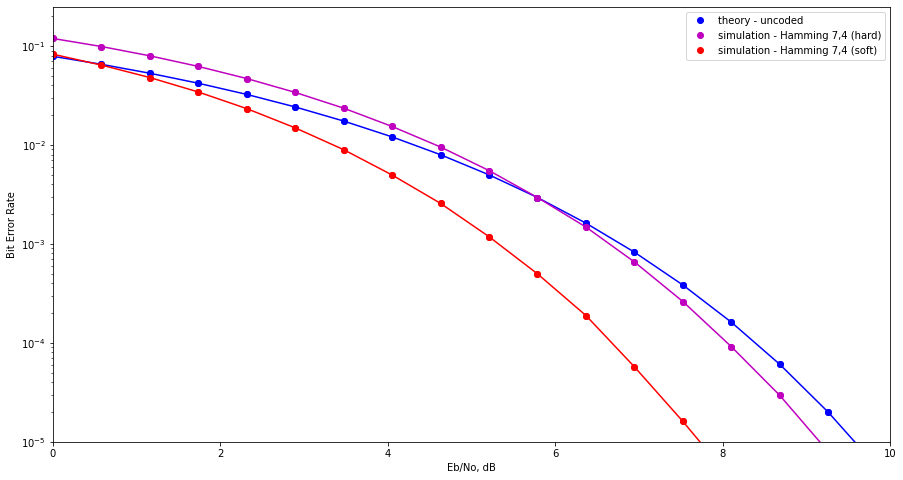

The excution time was 31572.33 seconds


In [3]:
init_time = time.time()

# Número de bits a ser transmitida
n_symbols_sequence = 10**7 * code.G.shape[0] #símbols

# Potências que serão usadas para aplicar os erros no canal
Eb_N0_dB = np.linspace(0, 11, 20) #multiple Eb/N0 values

Ec_N0_dB = Eb_N0_dB - 10 * math.log(code.G.shape[1] / code.G.shape[0], 10)

#Armazena os valores dos erros para cada umas das potências
num_error_soft_decision = []
num_error_hard_decision = []

for Ec_N0_dB_value in Ec_N0_dB:
    # Sinal transmitido
    tx_signal = np.round(np.random.rand(1,n_symbols_sequence))[0]

    # Aplica os bits de paridade nos bits de informação
    tx_signal_enconded = code.enconder(tx_signal)

    # Aplica a modulação BPSK
    tx_signal_enconded_BPSK = code.modulation_BPSK(tx_signal_enconded)

    # Adiciona rúido gaussiano branco ao canal
    rx_signal = code.add_RAGB(tx_signal_enconded_BPSK, mu_AWGN=0, sigma_AWGN=1, EcN0dBs=Ec_N0_dB_value)

    ## Decoficação por Soft Decision
    rx_signal_softdecoder = code.decoderAWGN(rx_signal)

    ## Decoficação por Hard Decision
    rx_signal_harddecoder = code.decoderBSC(rx_signal)

    ## Verifica a ocorrencia de erro no sinal
    # Erro soft decision
    num_error_soft_decision.append(sum(((tx_signal - rx_signal_softdecoder) != 0)))
    num_error_hard_decision.append(sum(((tx_signal - rx_signal_harddecoder) != 0)))
    
    
theoryBer = 0.5 * special.erfc(np.sqrt(10**(Eb_N0_dB/10)))

simBer_soft = np.array(num_error_soft_decision)/n_symbols_sequence
simBer_hard = np.array(num_error_hard_decision)/n_symbols_sequence

plt.figure(figsize=(15,8))
plt.semilogy(Eb_N0_dB, theoryBer,'bo',Eb_N0_dB, theoryBer,'b')
plt.semilogy(Eb_N0_dB, theoryBer,'bo',label='theory - uncoded')
plt.semilogy(Eb_N0_dB, simBer_hard, 'mo',Eb_N0_dB, simBer_hard, 'm')
plt.semilogy(Eb_N0_dB, simBer_hard, 'mo',label=f"simulation - Hamming {code.G.shape[1]},{code.G.shape[0]} (hard)")
plt.semilogy(Eb_N0_dB, simBer_soft,'ro',Eb_N0_dB, simBer_soft, 'r')
plt.semilogy(Eb_N0_dB, simBer_soft,'ro',label=f'simulation - Hamming {code.G.shape[1]},{code.G.shape[0]} (soft)')
plt.xlabel("Eb/No, dB")
plt.ylabel("Bit Error Rate")

plt.gca().set_xlim(left=0, right=10)
plt.gca().set_ylim(bottom=10**-5)

#plt.legend(borderaxespad=0)
plt.legend()

plt.show()

print(f"The excution time was {time.time() - init_time:.2f} seconds")